## Introduction

This dataset was obtained from Kaggle (https://www.kaggle.com/datasets/pratyushpuri/ai-vs-human-content-detection-1000-record-in-2025) and contains 1,367 writing samples sourced from eight different mediums. The dataset is evenly balanced, with half of the samples authored by humans and the other half generated by AI. The objective of this project is to identify the classification model that achieves the highest accuracy in distinguishing between human- and AI-generated content.

In [36]:
#import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

from sklearn.model_selection import GridSearchCV

### Importing and Cleaning the Dataset

In [2]:
df = pd.read_csv('ai_human_content_detection_dataset.csv')

In [3]:
df

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congress month from thought instead anything. ...,academic_paper,251,1677,44,0.9721,5.70,5.69,0.0262,50.72,8.02,0,0.1232,112.37,0.6893,0.2415,0
1363,Learn lead reveal great action. Left theory pa...,article,79,503,15,0.9620,5.27,5.38,0.0298,60.13,6.16,0,0.2369,111.76,0.6263,-0.8244,0
1364,Third few low hard peace paper pass front. Mea...,social_media,15,94,3,1.0000,5.00,5.33,0.0319,NaN,4.67,0,0.1296,37.37,0.2182,0.8319,0
1365,Power word west very news. Truth action base p...,blog_post,92,578,14,0.9891,6.57,5.29,0.0242,61.31,7.41,0,0.1898,46.58,0.1151,0.1486,0


In [6]:
#vectorizes the text data using TD-IDF and removed stope words
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df["text_content"])

In [7]:
#creates a dataframe from the vectorized matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [8]:
tfidf_df

,ability,able,accept,according,account,act,action,activity,actually,add,...,world,worry,write,writer,wrong,yard,yeah,year,yes,young
0,0.000000,0.0,0.000000,0.059526,0.060724,0.000000,0.000000,0.000000,0.0,0.000000,...,0.119265,0.0,0.000000,0.060837,0.0,0.000000,0.000000,0.000000,0.0,0.058800
1,0.000000,0.0,0.000000,0.000000,0.000000,0.061845,0.000000,0.064149,0.0,0.000000,...,0.000000,0.0,0.064767,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.045570,0.000000,0.000000,0.000000,0.0,0.087348,...,0.000000,0.0,0.046617,0.045655,0.0,0.000000,0.044671,0.000000,0.0,0.044126
3,0.072535,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.073650,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.077656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0.000000,0.0,0.000000,0.066310,0.000000,0.066075,0.000000,0.068537,0.0,0.000000,...,0.066428,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1363,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.118339,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1364,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1365,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.113366,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.112733,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [4]:
df['content_type'].unique()

array(['academic_paper', 'essay', 'creative_writing', 'news_article',
       'blog_post', 'article', 'social_media', 'product_review'],
      dtype=object)

In [5]:
contentDict = {
    'academic_paper':1,
    'essay':2,
    'creative_writing':3,
    'news_article':4,
    'blog_post':5,
    'article':6,
    'social_media':7,
    'product_review':8
}

In [9]:
#to be able to use the 'content_type' column in the dataframe, you would need to assign it a numerical value 
#in order to be represented in the data model
contentLst = []

for i in df['content_type']:
    contentLst.append(contentDict[i])

In [10]:
df['Content_num'] = contentLst

In [11]:
df

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label,Content_num
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1,2
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1,3
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congress month from thought instead anything. ...,academic_paper,251,1677,44,0.9721,5.70,5.69,0.0262,50.72,8.02,0,0.1232,112.37,0.6893,0.2415,0,1
1363,Learn lead reveal great action. Left theory pa...,article,79,503,15,0.9620,5.27,5.38,0.0298,60.13,6.16,0,0.2369,111.76,0.6263,-0.8244,0,6
1364,Third few low hard peace paper pass front. Mea...,social_media,15,94,3,1.0000,5.00,5.33,0.0319,NaN,4.67,0,0.1296,37.37,0.2182,0.8319,0,7
1365,Power word west very news. Truth action base p...,blog_post,92,578,14,0.9891,6.57,5.29,0.0242,61.31,7.41,0,0.1898,46.58,0.1151,0.1486,0,5


In [12]:
#merging the two dataframes so that you have both the original information and the TD-IDF data
merged_df = pd.merge(df, tfidf_df, left_index=True, right_index=True, how='inner')

In [13]:
merged_df = merged_df.drop(['text_content', 'content_type'], axis=1)

In [14]:
merged_df

,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,...,world,worry,write,writer,wrong,yard,yeah,year,yes,young
0,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,...,0.119265,0.0,0.000000,0.060837,0.0,0.000000,0.000000,0.000000,0.0,0.058800
1,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,...,0.000000,0.0,0.064767,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,...,0.000000,0.0,0.046617,0.045655,0.0,0.000000,0.044671,0.000000,0.0,0.044126
3,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,...,0.000000,0.0,0.073650,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.077656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,251,1677,44,0.9721,5.70,5.69,0.0262,50.72,8.02,0,...,0.066428,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1363,79,503,15,0.9620,5.27,5.38,0.0298,60.13,6.16,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1364,15,94,3,1.0000,5.00,5.33,0.0319,NaN,4.67,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1365,92,578,14,0.9891,6.57,5.29,0.0242,61.31,7.41,0,...,0.000000,0.0,0.000000,0.112733,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [15]:
#verifying that the labels are balanced
print('1:',sum(merged_df['label']))
print('0:', 1367 - sum(merged_df['label']))

1: 683
0: 684


In [16]:
merged_df = merged_df.fillna(0)

## Data Models

In [17]:
X = merged_df.drop(['label'], axis=1)
y = merged_df['label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest Classifier

In [33]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 51.09%


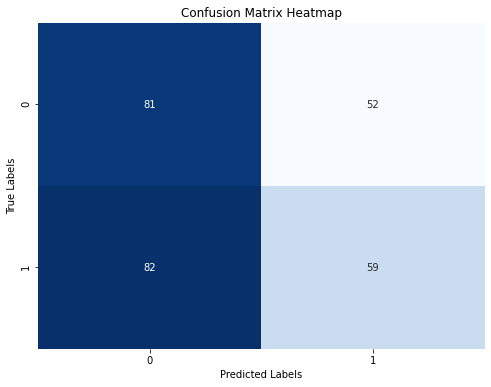

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [35]:
param_grid = {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 10, 20],      # Maximum depth of the tree
        'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
        'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
    }

In [39]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [40]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [41]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
Best cross-validation score:  0.5260818566461396


In [42]:
best_rf_model = grid_search.best_estimator_
test_score = best_rf_model.score(X_test, y_test)
print("Test set score of the best model: ", test_score)

Test set score of the best model:  0.5072992700729927


### Decision Tree Classifier

In [44]:
dtc = DecisionTreeClassifier(random_state=1)

In [46]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Accuracy: 0.4854014598540146


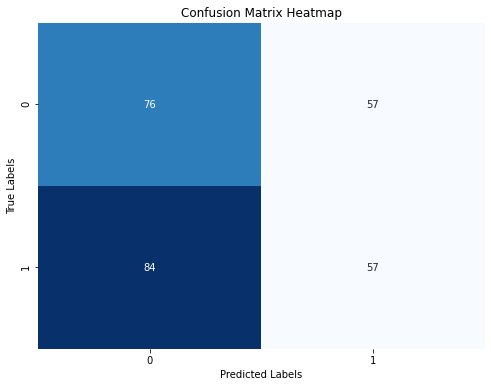

In [51]:
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [48]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.5187842989401366
DecisionTreeClassifier(max_depth=6, min_samples_leaf=13, random_state=1)


In [50]:
best_dtc_model = grid_search.best_estimator_
test_score = best_dtc_model.score(X_test, y_test)
print("Test set score of the best model: ", test_score)

Test set score of the best model:  0.5072992700729927


### SVM Classifier

In [ ]:
svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

#cv_scores = cross_val_score(svm, X, y, cv=5)  # returns scores for each fold
#print(f"Cross-validation scores: {cv_scores}")
#print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

Test Accuracy: 0.7591


### KNN Classifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5182481751824818


### Logistic Regression Classifier

In [25]:
lr = LogisticRegression(max_iter=10000, random_state=0)
lr.fit(X_train, y_train)

acc = accuracy_score(y_test, lr.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 50.73%


### Naive Bayes Classifier

In [30]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5109489051094891
F1 Score: 0.5112621818477951


## Final Conclusion

Among the six most common classification models evaluated, the Support Vector Machine (SVM) achieved the highest accuracy. The other five models yielded accuracies near 50%, which is essentially equivalent to random chance. While the SVM demonstrated superior predictive performance, it also required the longest execution time, with a runtime of approximately 40 minutes.

As a next step, the SVM model should be saved for future use and applied to additional datasets to evaluate its generalizability and performance across different data sources.